# Hermite Simpson Seperated

In [21]:
import sys
sys.path.append('../')
from numpy import *
from Trajectory import Point_Lander
from Optimisation import Hermite_Simpson_Seperated
from PyGMO import *
import matplotlib.pyplot as plt

In [33]:
# Instantiate the model and problem
model = Point_Lander()
prob  = Hermite_Simpson_Seperated(model, 50)

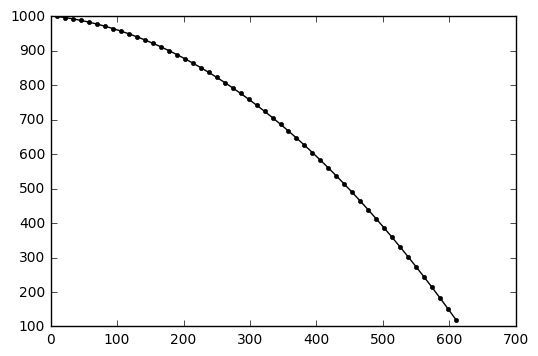

In [34]:
# Generate a ballistic guess
zguess = prob.Guess.Ballistic(tf=30)
tf, sb, cb, s, c = prob.Decode(zguess)
plt.plot(s[:,0], s[:,1], 'k.-')
plt.show()

In [35]:
# Sequential least squares quadratic programming
algo = algorithm.scipy_slsqp(max_iter=3000, screen_output=True)
algo = algorithm.mbh(algo, screen_output=True, stop=1)

In [36]:
# Instantiate an empty population
pop = population(prob)
# Add the ballistic decision to it
pop.push_back(zguess)

In [ ]:
# Optimise the trajectory!
pop = algo.evolve(pop)

  NIT    FC           OBJFUN            GNORM
    1   811    -9.119095E+03     1.000000E+00
    2  1622    -9.119714E+03     1.000000E+00
    3  2433    -9.119995E+03     1.000000E+00
    4  3244    -9.120948E+03     1.000000E+00
    5  4055    -9.122422E+03     1.000000E+00
    6  4866    -9.122033E+03     1.000000E+00
    7  5677    -9.118816E+03     1.000000E+00
    8  6488    -9.116110E+03     1.000000E+00
    9  7299    -9.114648E+03     1.000000E+00
   10  8110    -9.110070E+03     1.000000E+00
   11  8921    -9.105593E+03     1.000000E+00
   12  9732    -9.102536E+03     1.000000E+00
   13 10543    -9.103147E+03     1.000000E+00
   14 11354    -9.101612E+03     1.000000E+00
   15 12165    -9.100322E+03     1.000000E+00
   16 12976    -9.100311E+03     1.000000E+00
   17 13787    -9.101595E+03     1.000000E+00
   18 14598    -9.102339E+03     1.000000E+00
   19 15409    -9.137790E+03     1.000000E+00
   20 16220    -9.128073E+03     1.000000E+00
   21 17031    -9.124088E+03     1

In [25]:
# The solution!
z = pop.champion.x
# The path to the data folder
fname  = "../Data/Hermite_Simpson_Seperated/40Seg/HSS_40_Base"
save(fname, z)

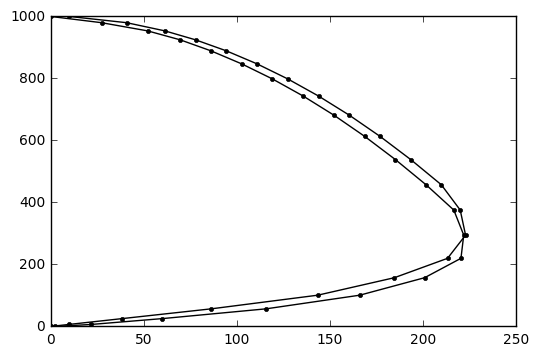

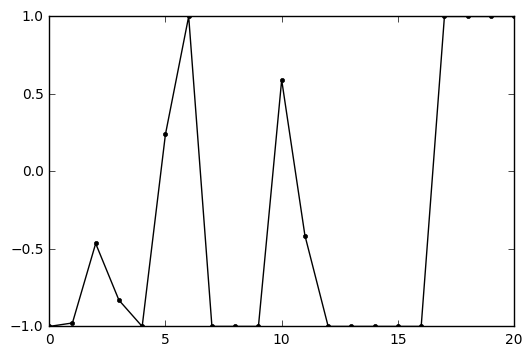

In [32]:
z = load("../Data/Hermite_Simpson_Seperated/HSS_20_Base.npy")
tf, sb, cb, s, c = prob.Decode(z)
plt.plot(s[:,0], s[:,1], 'k.-')
plt.plot(sb[:,0], s[:,1], 'k.-')
plt.show()
plt.plot(c[:,1], 'k.-')
plt.show()